# Import librerie

In [443]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Visualizzazione file CSV

In [444]:
df = pd.read_csv('C:\\Users\\compu\\Documents\\GitHub\\RepoSpotify_AnnaAntoRosy\\spotify_2015_2025.csv')
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [445]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,explicit
count,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,8.500000e+04,85000.000000
mean,254913.824294,48.162894,0.520710,0.505412,5.515988,-27.999300,0.500141,0.399781,129.948351,2.143547e+05,0.201329
std,95300.233207,14.829752,0.270799,0.279774,3.454069,15.598365,0.500003,0.231470,40.444321,1.680637e+06,0.400996
min,90004.000000,0.000000,0.050000,0.020000,0.000000,-55.000000,0.000000,0.000000,60.000000,1.000000e+03,0.000000
25%,171871.500000,38.000000,0.290000,0.260000,2.750000,-41.470000,0.000000,0.198000,94.840000,1.000000e+03,0.000000
50%,254920.500000,47.000000,0.520000,0.500000,6.000000,-27.970000,1.000000,0.399000,129.990000,2.000000e+03,0.000000
75%,337203.250000,57.000000,0.760000,0.750000,9.000000,-14.500000,1.000000,0.600000,165.030000,9.000000e+03,0.000000
max,420000.000000,100.000000,0.990000,0.990000,11.000000,-1.000000,1.000000,0.800000,200.000000,2.000000e+07,1.000000


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

# Rimozione duplicati

In [447]:
#drop dei duplicati
df = df.drop_duplicates()



# Verifica valori mancanti

In [448]:
#vediamo se ci sono valori mancanti
df.isnull().sum()

track_id             0
track_name          21
artist_name          0
album_name          46
release_date         0
genre                0
duration_ms          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
instrumentalness     0
tempo                0
stream_count         0
country              0
explicit             0
label                0
dtype: int64

## Visualizzazione colonna data

In [449]:
df['release_date'].head()

0    2016-04-01
1    2022-04-15
2    2016-02-23
3    2015-10-12
4    2022-07-08
Name: release_date, dtype: object

Conversione formato data

In [450]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date_YYYYMMDD'] = df['release_date'].dt.strftime('%Y%m%d')
df['release_date_YYYYMMDD'].head()


0    20160401
1    20220415
2    20160223
3    20151012
4    20220708
Name: release_date_YYYYMMDD, dtype: object

In [451]:
#sostiuire release_date_YYYYMMDD con release_date perche' e' piu' utile
df['release_date'] = df['release_date_YYYYMMDD']

df.head()


,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_date_YYYYMMDD
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,20160401,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music,20160401
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,20220415,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records,20220415
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,20160223,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings,20160223
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,20151012,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music,20151012
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,20220708,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent,20220708


In [452]:
df.drop(columns=['release_date_YYYYMMDD'], inplace=True)
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,20160401,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,20220415,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,20160223,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,20151012,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,20220708,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


Generi più rilevanti nelle città

In [453]:
genre_country = df.groupby(['country', 'genre']).size().reset_index(name='count')

Grafico a barre per paese

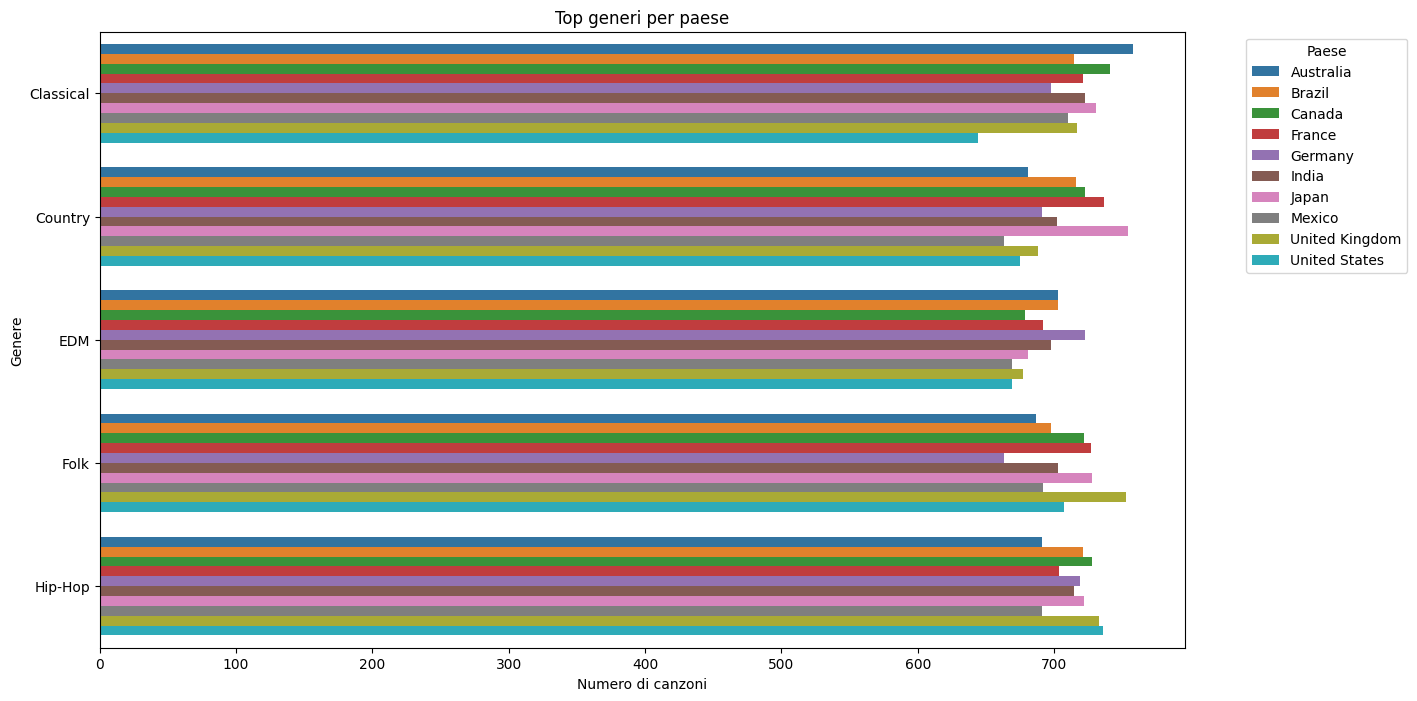

In [454]:
# Prendi i top 5 generi per ogni paese
top_genres = genre_country.groupby('country').head(5)

plt.figure(figsize=(14,8))
sns.barplot(data=top_genres, x='count', y='genre', hue='country')
plt.title('Top generi per paese')
plt.xlabel('Numero di canzoni')
plt.ylabel('Genere')
plt.legend(title='Paese', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Grafico heatmap(mappa che indica i generi più presenti nelle country)

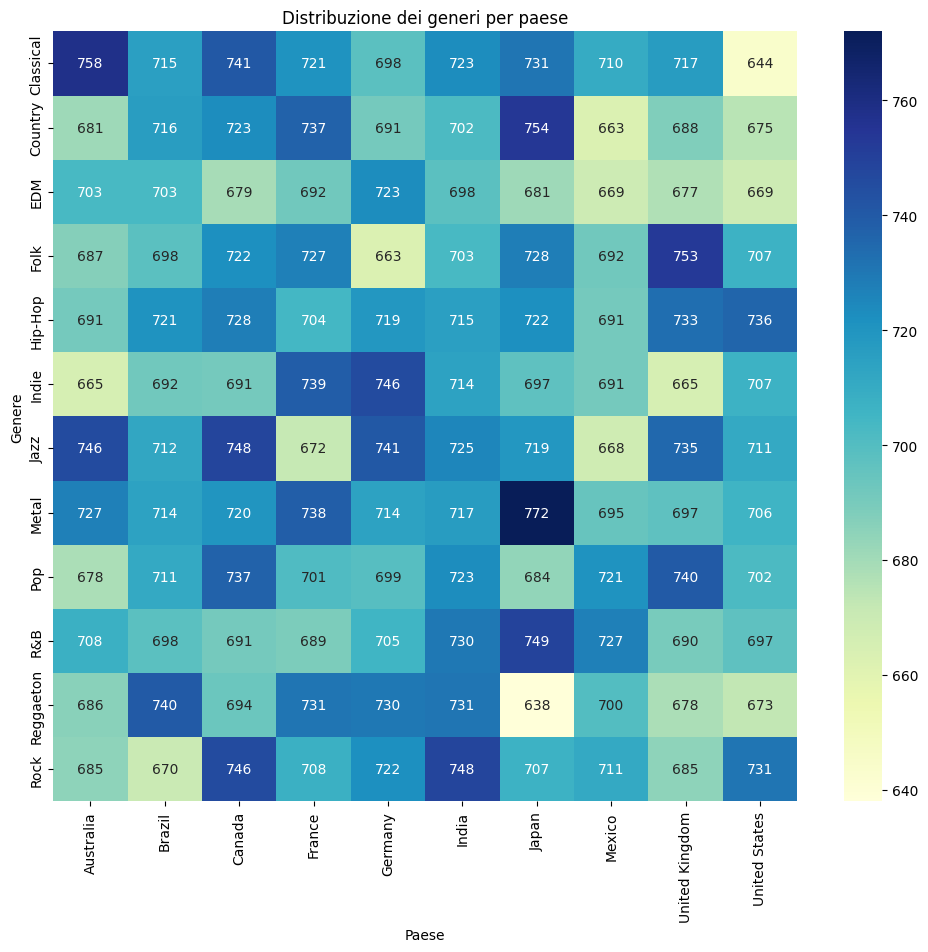

In [455]:
# Pivot per creare la matrice paese x genere
heatmap_data = genre_country.pivot(index='genre', columns='country', values='count').fillna(0)

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Distribuzione dei generi per paese')
plt.xlabel('Paese')
plt.ylabel('Genere')
plt.show()

Matrice di correlazione con heatmap

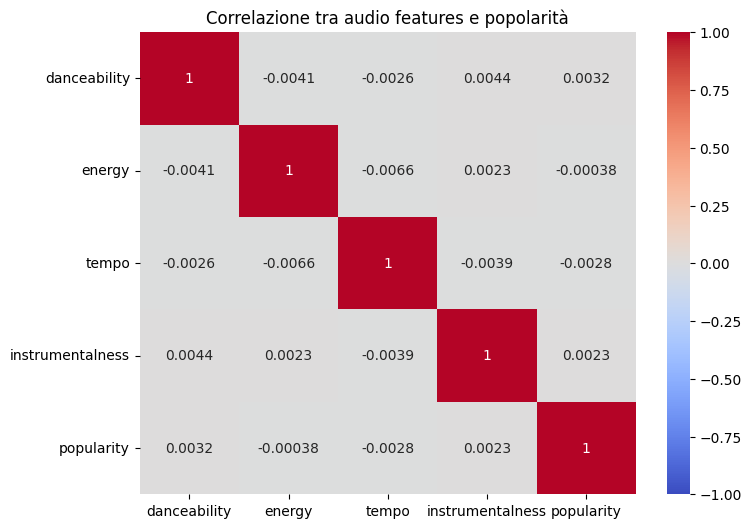

In [456]:
# Seleziona solo le colonne numeriche rilevanti
audio_features = ['danceability', 'energy', 'tempo', 'instrumentalness']
df_corr = df[audio_features + ['popularity']].corr()

# Mostra heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlazione tra audio features e popolarità')
plt.show()

# Analisi esplorativa dei dati
-Distribuzione target: il punteggio di popolarità è distribuito normalmente o asimmetrico?

-Analisi correlazione: in che modo caratteristiche audio come energia e volume si relazionano tra loro?

-Impatto sul genere: alcuni generi tendono ad avere punteggi di popolarità più elevati rispetto ad altri?

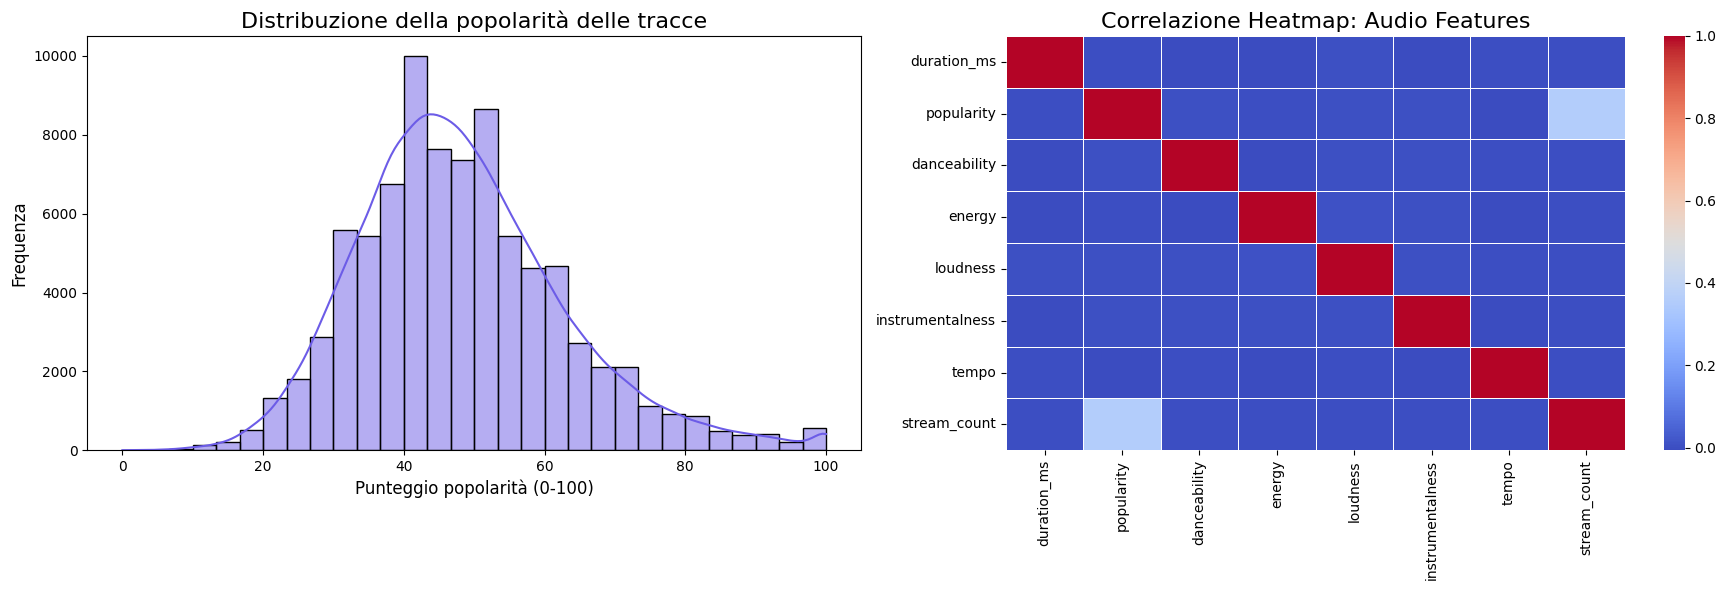

C:\Users\compu\AppData\Local\Temp\ipykernel_17888\736711839.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genre', y='popularity', order=order, palette='viridis')


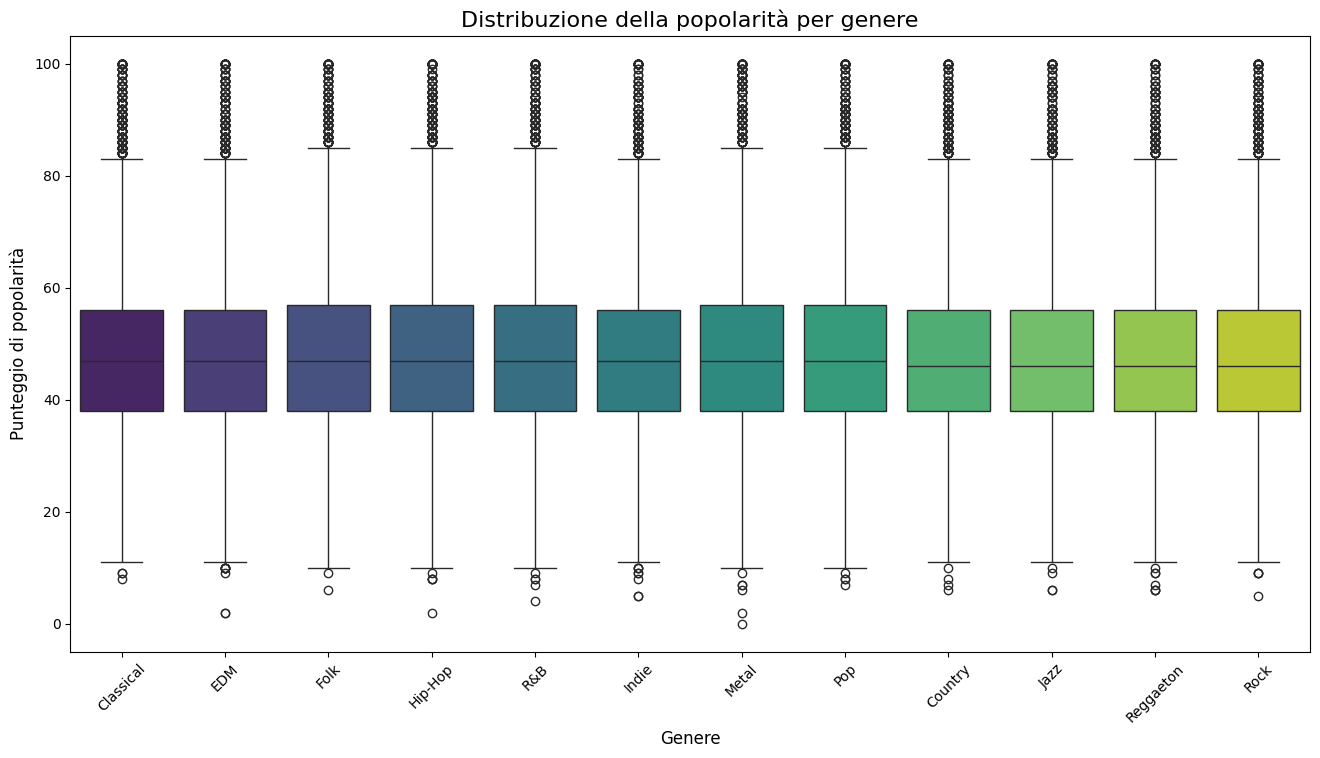

Genere più popolare (Mediana): Classical
Genere meno popolare (Mediana): Rock


In [457]:
# Creazione di un subplot con 2 grafici
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Grafico - Distribuzione variabile target (popularity)
sns.histplot(df['popularity'], kde=True, bins=30, color='#6c5ce7', ax=axes[0])
axes[0].set_title('Distribuzione della popolarità delle tracce', fontsize=16)
axes[0].set_xlabel('Punteggio popolarità (0-100)', fontsize=12)
axes[0].set_ylabel('Frequenza', fontsize=12)

# Grafico - Heatmap di correlazione con selezione delle colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['explicit', 'mode', 'key'])
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlazione Heatmap: Audio Features', fontsize=16)

plt.tight_layout()
plt.show()

# Grafico - Popolarità per Genere (Boxplot)
plt.figure(figsize=(16, 8))
order = df.groupby('genre')['popularity'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='genre', y='popularity', order=order, palette='viridis')
plt.title('Distribuzione della popolarità per genere', fontsize=16)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Punteggio di popolarità', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Stampa i risultati
print("Genere più popolare (Mediana):", order[0])
print("Genere meno popolare (Mediana):", order[-1])